In [89]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Lets do some Machine learning

In [7]:
def evaluate_classification_model(model, X_test, y_test):
    """
    Evaluates the performance of a regression model and provides a summary.

    Parameters:
        model: A trained regression model from scikit-learn.
        X_test: Test features.
        y_test: Test labels.
    """
    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    f1 = f1_score(y_test, y_pred)

    # Display results
    print(f"Classification Model {model} Evaluation:")
    print("===========================")
    print(f"F1 score: {f1:.2f}")

## read data

In [8]:
train_data = np.genfromtxt('/content/drive/MyDrive/fighters-detection/train.csv', delimiter=';')
val_data = np.genfromtxt('/content/drive/MyDrive/fighters-detection/val.csv', delimiter=';')
test_data = np.genfromtxt('/content/drive/MyDrive/fighters-detection/test.csv', delimiter=';')

In [9]:
X_train = train_data[:,:-1]
y_train = train_data[:,-1].astype(int)
X_val = val_data[:,:-1]
y_val = val_data[:,-1].astype(int)
X_test = test_data[:,:-1]
y_test = test_data[:,-1].astype(int)

Determine few clssification models

In [10]:
svc = SVC()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
kn = KNeighborsClassifier()
abc = AdaBoostClassifier()
gnb = GaussianNB()

In [11]:
scaler = StandardScaler()

In [12]:
svc_pipe = Pipeline([
    ('scaler', scaler),
    ('model', svc),
    ])
rfc_pipe = Pipeline([
    ('scaler', scaler),
    ('model', rfc),
    ])
gbc_pipe = Pipeline([
    ('scaler', scaler),
    ('model', gbc),
    ])
kn_pipe = Pipeline([
    ('scaler', scaler),
    ('model', kn),
    ])
abc_pipe = Pipeline([
    ('scaler', scaler),
    ('model', abc),
    ])
gnb_pipe = Pipeline([
    ('scaler', scaler),
    ('model', gnb),
    ])


In [13]:
svc_pipe.fit(X_train, y_train).score(X_val, y_val)
rfc_pipe.fit(X_train, y_train).score(X_val, y_val)
gbc_pipe.fit(X_train, y_train).score(X_val, y_val)
kn_pipe.fit(X_train, y_train).score(X_val, y_val)
abc_pipe.fit(X_train, y_train).score(X_val, y_val)
gnb_pipe.fit(X_train, y_train).score(X_val, y_val)

0.9797395079594791

In [14]:
evaluate_classification_model(svc_pipe, X_test, y_test)
evaluate_classification_model(rfc_pipe, X_test, y_test)
evaluate_classification_model(gbc_pipe, X_test, y_test)
evaluate_classification_model(kn_pipe, X_test, y_test)
evaluate_classification_model(abc_pipe, X_test, y_test)
evaluate_classification_model(gnb_pipe, X_test, y_test)

Classification Model Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())]) Evaluation:
F1 score: 0.61
Classification Model Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())]) Evaluation:
F1 score: 0.88
Classification Model Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())]) Evaluation:
F1 score: 0.58
Classification Model Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())]) Evaluation:
F1 score: 0.38
Classification Model Pipeline(steps=[('scaler', StandardScaler()), ('model', AdaBoostClassifier())]) Evaluation:
F1 score: 0.61
Classification Model Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())]) Evaluation:
F1 score: 0.62


In [15]:
preds = rfc_pipe.predict(X_test)

In [16]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0])

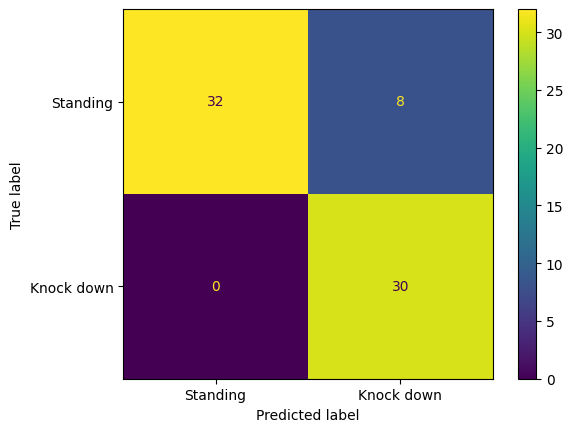

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Standing", "Knock down"])

cm_display.plot()
plt.show()

In [18]:
precision_score(y_test, preds)

0.7894736842105263

In [19]:
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

In [20]:
grid_search = GridSearchCV(rfc_pipe, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1')

In [21]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [22]:
best_params

{'model__max_depth': 20,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 50}

In [23]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_split=5,
                                        n_estimators=50))])

In [36]:
evaluate_classification_model(best_model, X_test, y_test)

Classification Model Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_split=5,
                                        n_estimators=50))]) Evaluation:
F1 score: 0.89


In [29]:
# model = RandomForestClassifier(
#     max_depth=20,
#     min_samples_leaf=1,
#     min_samples_split=5,
#     n_estimators=50)

In [37]:
final_pipe = Pipeline([
    ('scaler', scaler),
    ('model', RandomForestClassifier()),
    ])

In [38]:
final_pipe.set_params(**{key: value for key, value in best_params.items()})

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_split=5,
                                        n_estimators=50))])

In [39]:
final_pipe.fit(X_train, y_train).score(X_val, y_val)

0.2725518572117704

In [40]:
evaluate_classification_model(final_pipe, X_test, y_test)

Classification Model Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_split=5,
                                        n_estimators=50))]) Evaluation:
F1 score: 0.92


In [41]:
final_preds = final_pipe.predict(X_test)

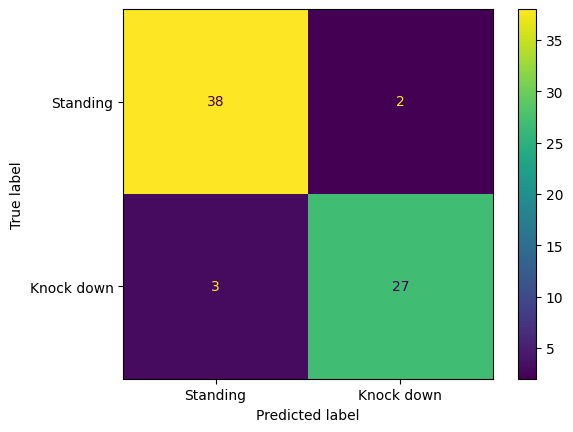

In [42]:
cm = confusion_matrix(y_test, final_preds)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Standing", "Knock down"])

cm_display.plot()
plt.show()